Best Tour: Chittorgarh -> Udaipur -> Mount Abu -> Jodhpur -> Jaisalmer -> Bikaner -> Pushkar -> Ajmer -> Mandawa -> Sikar -> Shekhawati -> Kalpa -> Neemrana -> Alwar -> Jaipur -> Tonk -> Sawai Madhopur -> Ranthambore -> Kota -> Bundi
Minimum Cost (Simulated Annealing): 25.999772211120135


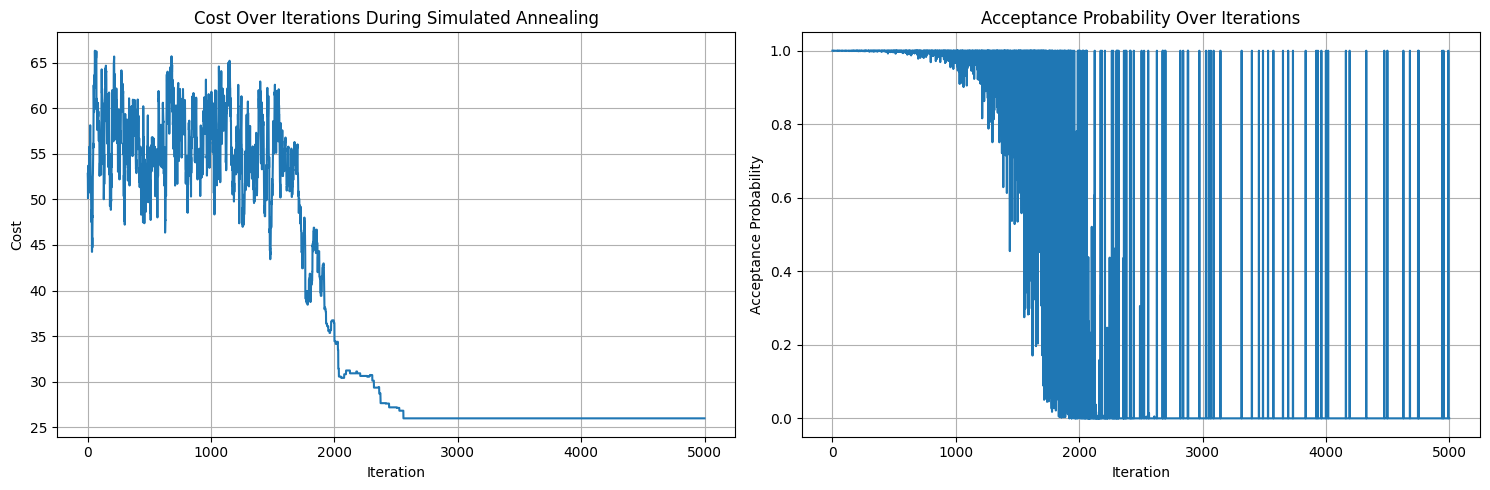

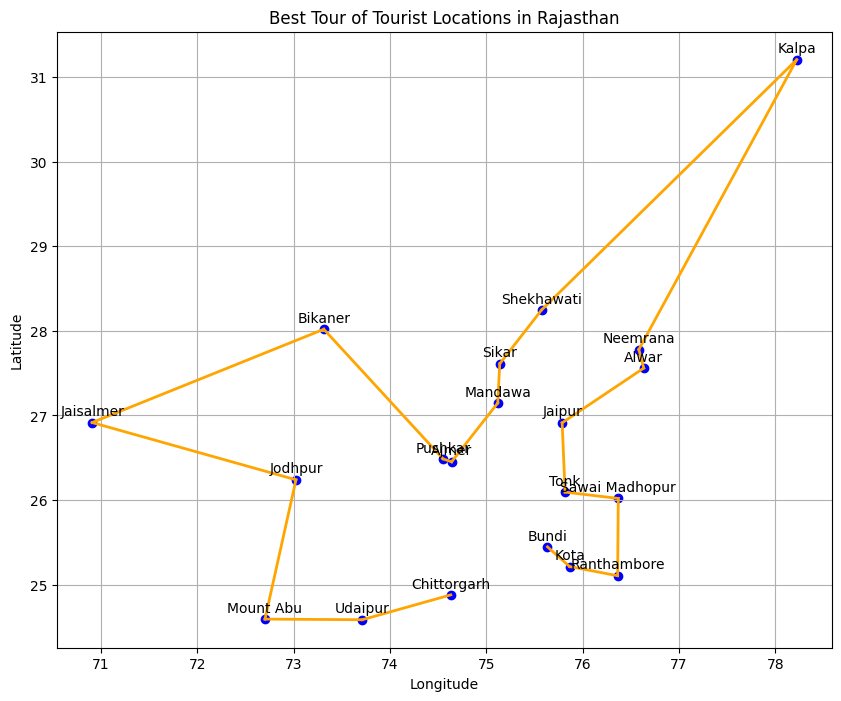

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform


locations = {
    "Jaipur": (26.9124, 75.7873),
    "Udaipur": (24.5854, 73.7125),
    "Jodhpur": (26.2389, 73.0243),
    "Jaisalmer": (26.9157, 70.9083),
    "Ajmer": (26.4516, 74.6399),
    "Pushkar": (26.4864, 74.5512),
    "Bikaner": (28.0182, 73.3134),
    "Kota": (25.2138, 75.8648),
    "Chittorgarh": (24.8790, 74.6308),
    "Mount Abu": (24.5926, 72.7026),
    "Ranthambore": (25.1054, 76.3632),
    "Neemrana": (27.7784, 76.5832),
    "Mandawa": (27.1464, 75.1187),
    "Tonk": (26.0934, 75.8180),
    "Shekhawati": (28.2454, 75.5732),
    "Bundi": (25.4466, 75.6350),
    "Sikar": (27.6104, 75.1395),
    "Sawai Madhopur": (26.0187, 76.3700),
    "Kalpa": (31.2036, 78.2218),
    "Alwar": (27.5589, 76.6342)
}

# Step 2: Compute the distance matrix
def compute_distance_matrix(locations):
    coords = np.array(list(locations.values()))
    return squareform(pdist(coords, metric='euclidean'))

distance_matrix = compute_distance_matrix(locations)

# Step 3: Optimized Simulated Annealing for TSP
class OptimizedSimulatedAnnealingTSP:
    def __init__(self, graph, initial_temp=10000, cooling_rate=0.995, max_iterations=5000):
        self.graph = graph
        self.num_cities = len(graph)
        self.current_solution = np.arange(self.num_cities)
        np.random.shuffle(self.current_solution)
        self.current_cost = self.calculate_cost(self.current_solution)
        self.best_solution = np.copy(self.current_solution)
        self.best_cost = self.current_cost
        self.temperature = initial_temp
        self.cooling_rate = cooling_rate
        self.max_iterations = max_iterations
        self.cost_history = []
        self.acceptance_probabilities = []

    def calculate_cost(self, solution):
        return np.sum(self.graph[solution[:-1], solution[1:]]) + self.graph[solution[-1], solution[0]]

    def swap_cities(self, solution):
      
        i, j = np.random.choice(self.num_cities, 2, replace=False)
        if i > j:
            i, j = j, i
        new_solution = np.concatenate((solution[:i], solution[i:j+1][::-1], solution[j+1:]))
        return new_solution

    def optimize(self):
        for iteration in range(self.max_iterations):
            new_solution = self.swap_cities(self.current_solution)
            new_cost = self.calculate_cost(new_solution)
            cost_diff = new_cost - self.current_cost

            acceptance_probability = np.exp(-cost_diff / self.temperature) if cost_diff > 0 else 1
            self.acceptance_probabilities.append(acceptance_probability)

            if cost_diff < 0 or np.random.rand() < acceptance_probability:
                self.current_solution = new_solution
                self.current_cost = new_cost

                if self.current_cost < self.best_cost:
                    self.best_solution = np.copy(self.current_solution)
                    self.best_cost = self.current_cost

            self.cost_history.append(self.current_cost)
            self.temperature *= self.cooling_rate

        return self.best_solution, self.best_cost


sa = OptimizedSimulatedAnnealingTSP(distance_matrix)
best_tour, best_cost = sa.optimize()


best_tour_names = [list(locations.keys())[i] for i in best_tour]


print("Best Tour:", " -> ".join(best_tour_names))
print("Minimum Cost (Simulated Annealing):", best_cost)


plt.figure(figsize=(15, 5))


plt.subplot(1, 2, 1)
plt.plot(sa.cost_history)
plt.title('Cost Over Iterations During Simulated Annealing')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid()


plt.subplot(1, 2, 2)
plt.plot(sa.acceptance_probabilities)
plt.title('Acceptance Probability Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Acceptance Probability')
plt.grid()

plt.tight_layout()
plt.show()


latitudes = [loc[0] for loc in locations.values()]
longitudes = [loc[1] for loc in locations.values()]

plt.figure(figsize=(10, 8))


for i in range(len(best_tour) - 1):
    plt.plot(
        [longitudes[best_tour[i]], longitudes[best_tour[i + 1]]],
        [latitudes[best_tour[i]], latitudes[best_tour[i + 1]]],
        color='orange', linewidth=2
    )


plt.scatter(longitudes, latitudes, color='blue', marker='o')


for i, city in enumerate(locations.keys()):
    plt.annotate(city, (longitudes[i], latitudes[i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.title('Best Tour of Tourist Locations in Rajasthan')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()
